In [38]:
%matplotlib inline
import numpy as np
import os
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.formula.api as smf



In [5]:
titanic = pd.read_csv('train.csv')


In [27]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [6]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Average Age is: ##

In [33]:
np.mean(titanic['Age'])

29.69911764705882

In [45]:
titanic['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [46]:
titanic['Age'].std()

14.526497332334042

# Average Pclass:

In [18]:
np.mean(titanic['Pclass'])

2.308641975308642

In [34]:
titanic['Pclass'].unique().tolist()

[3, 1, 2]

14.526497332334042

In [77]:
import os
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.632
Date:                Sun, 12 Jan 2020   Prob (F-statistic):             0.0102
Time:                        21:39:10   Log-Likelihood:                -3843.0
No. Observations:                 714   AIC:                             7690.
Df Residuals:                     712   BIC:                             7699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.3009      4.492      5.410      0.000      15.481      33.120
Age            0.3500      0.136      2.575      0.010       0.083       0.617
==============================================================================
Omnibus:                      716.815   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30883.661
Skew:                           4.654   Prob(JB):                         0.00
Kurtosis:                      33.846   Cond. No.                         75.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

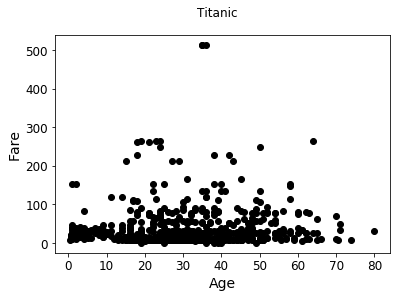

In [78]:
fig = plt.figure()
plt.scatter(x = titanic['Age'], y = titanic['Fare'], c = "black")
fig.suptitle("Titanic")
plt.ylabel("Fare")
plt.xlabel("Age")
m_titanic = smf.ols('Fare ~ Age', data = titanic).fit()
sm.stats.anova_lm(m_titanic, type = 2)
m_titanic.summary()



In [60]:
y_su = titanic[titanic["Pclass"]==1]["Fare"]
y_fa = titanic[titanic["Pclass"]==2]["Fare"]
y_wi =titanic[titanic["Pclass"]==3]["Fare"]
y_season = [y_su, y_fa, y_wi]



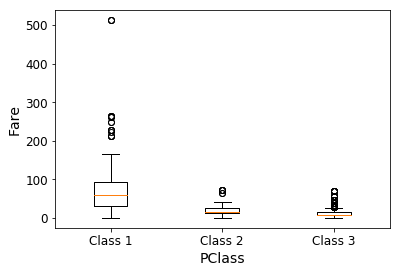

In [62]:
plt.boxplot(y_season, labels = ["Class 1", "Class 2", "Class 3"]);
plt.ylabel("Fare");
plt.xlabel("PClass");